## The dataset

This is a real dataset and it was downloaded using web scraping techniques. The data contains registers from fotocasa which is one of the most popular websites of real estate in Spain. Please, do not do this (web scraping) unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro and In no case were economic returns obtained from it.

It contains thousands of data from real homes published on the web www.fotocasa.com. Your goal is to extract as much information as possible with the knowledge you have so far about data science, for example what is the most expensive home in the entire dataset?

Let's start with precisely that question... Good luck!


#### Read the dataset assets/real_estate.csv and try to visualize the table (★☆☆)


In [2]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv ('assets/real_estate.csv', sep=';')
df.head()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN


In [4]:
df.dtypes

Unnamed: 0            int64
id_realEstates        int64
isNew                  bool
realEstate_name      object
phone_realEstate    float64
url_inmueble         object
rooms               float64
bathrooms           float64
surface             float64
price                 int64
date                 object
description          object
address              object
country              object
level1               object
level2               object
level3               object
level4               object
level5               object
level6               object
level7               object
level8               object
upperLevel           object
countryId             int64
level1Id              int64
level2Id              int64
level3Id              int64
level4Id              int64
level5Id              int64
level6Id              int64
level7Id              int64
level8Id              int64
accuracy              int64
latitude             object
longitude            object
zipCode             

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

#### What is the most expensive home in the dataset? (★☆☆)

In [6]:
df['price'].max()

8500000

#### What is cheapest home in the dataset? (★☆☆)

In [7]:
df['price'].min()

0

#### What is the biggest and the smallest home in the dataset? (★☆☆)

In [8]:
min = df['surface'].min()
max = df['surface'].max()
print('La casa mas grande es: ', max)
print ('La casa mas chica es: ', min)

La casa mas grande es:  249000.0
La casa mas chica es:  15.0


#### How many populations (level5) the dataset contains? (★☆☆)

In [9]:
df['level5Id'].count()

15335

#### Does the dataset contain NAs? (★☆☆)


In [10]:
df.isnull().sum()

Unnamed: 0              0
id_realEstates          0
isNew                   0
realEstate_name        10
phone_realEstate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                    0
description           142
address                 0
country                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperLevel              0
countryId               0
level1Id                0
level2Id                0
level3Id                0
level4Id                0
level5Id                0
level6Id                0
level7Id                0
level8Id                0
accuracy                0
latitude                0
longitude               0
zipCode             15335
customZone          15335
dtype: int64

#### Delete the NAs of the dataset, if applicable (★★☆)

In [11]:
df.dropna()

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone


#### What is the mean of prices in the population (level5) of "Arroyomolinos (Madrid)"? (★★☆)

In [44]:
df2= df.groupby(['level5'])['price'].mean().reset_index(name= 'Precio').sort_values(by='Precio', ascending=False)
df2['Precio'].mean()

250430.50175101668

#### Plot the histogram of prices for the population (level5) of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)

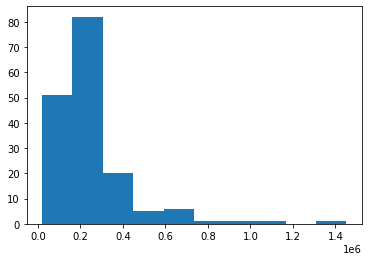

In [45]:
plt.hist(df2['Precio'])
plt.show()

#### Now let's work with the "south belt" of madrid. Make a subsetting that contains the following populations (level5): "Fuenlabrada","Leganés","Getafe","Alcorcón" (★★☆) 

In [54]:
df3 = df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))
df3

0        False
1         True
2        False
3         True
4        False
         ...  
15330    False
15331    False
15332    False
15333    False
15334    False
Name: level5, Length: 15335, dtype: bool

#### Make a bar plot of the median of prices (★★★) 

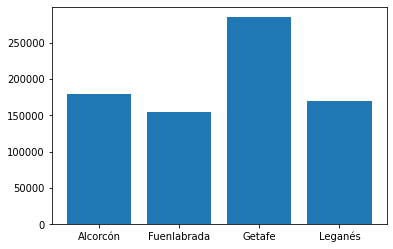

In [86]:
df3 = df[df['level5'].isin(('Fuenlabrada', 'Leganés', 'Getafe', 'Alcorcón'))]
df3 = df3[['level5', 'price']]
df4 = df3.groupby('level5').median()
lista = df4.index.values.tolist()
valores = df4['price'].tolist()
plt.bar(lista, valores)
plt.show()

#### Calculate the sample mean and variance of the variables: price, rooms, surface area and bathrooms (★★★) 

#### What is the most expensive home of each population? (★★☆) 

#### Normalize the variable of prices for each population and plot the 4 histograms in the same plot (★★★) 

#### Make a plot of the coordinates (lat and long) of the south belt of Madrid by color of each population (★★★★) 
This is a extremely hard exercise and we highly recommend to do it at the end of everything

In [ ]:
# Run in console the following command before run the rest of code:
# jupyter nbextension enable --py --sys-prefix ipyleaflet

from ipyleaflet import Map, basemaps

# Map centred on (60 degrees latitude et -2.2 degrees longitude)
# Latitude, longitude
map = Map(center = (60, -2.2), zoom = 2, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.Stamen.Terrain)
map

In [ ]:
## HERE: plot the coordinates of the estates

## PUT HERE YOUR CODE:


#### What can you say about the price per square meter between the towns of Getafe and Alcorcón?

#### Reload the data, is the average of "Valdemorillo" and "Galapagar" prices the same?

#### What happens if we do the same analysis for price/m2 (★★☆) 

#### Could you say there is a relation between surface and price? (★★☆) 
Hint: make a scatter plot.

#### Make the same plot for 4 different populations (level5) and rearrange them on the same graph? (★★☆) 
Hint: make a scatter plot of each population using subplots.

#### How many  real estate agencies the dataset contains? (★★☆) 

#### What is the population (level 5) that contains the most houses? (★★☆) 